# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Implementing a Machine Learning algorithm (The Relevance Vector Machine) 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a machine learning algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.

In this case, we are going to use the Relevance Vector Machine algorithm. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different of more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advantage of classical machine learning is the need of much less information than deep learning algorithms.

Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv file generated in Step 2:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
sma = pd.read_csv('./Results Step 2/machine_learning_data.csv')
sma#.head(3)

,SM,BAI,SAVIT,B4,B6,NDSI,MNDWI,CVI,SAVI,GEMI,...,NGRDI,VARI,NBR,MNDVI,GVMI,B2,NBRT,kVARI,B3,B1
0,0.39,10.113513,0.539735,0.3735,295.5,-0.358974,-0.358974,3.486000,0.411152,0.757530,...,0.086957,0.142012,0.618986,0.618986,0.628827,0.0900,0.986187,0.014440,0.0756,0.0642
1,0.32,10.595909,0.532088,0.3666,296.0,-0.387547,-0.387547,3.652422,0.395080,0.741872,...,0.054482,0.089423,0.556688,0.556688,0.579019,0.0900,0.983282,0.005706,0.0807,0.0667
2,0.50,12.580357,0.504472,0.3416,296.5,-0.288564,-0.288564,2.571921,0.357753,0.702719,...,0.107660,0.176122,0.555556,0.555556,0.579399,0.1070,0.983199,0.022106,0.0862,0.0751
3,0.47,11.995843,0.511969,0.3485,297.0,-0.300235,-0.300235,2.838363,0.361701,0.707913,...,0.081389,0.139061,0.562430,0.562430,0.584526,0.1043,0.983502,0.012890,0.0886,0.0800
4,0.07,20.168927,0.399352,0.2589,313.6,-0.318784,-0.318784,1.857574,0.080603,0.391713,...,-0.090166,-0.140731,-0.047286,-0.047286,0.081839,0.1670,0.933352,0.015952,0.2001,0.1319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.17,4.199442,0.703307,0.5458,303.9,-0.471952,-0.471952,4.761866,0.614990,0.954561,...,0.186415,0.280045,0.696085,0.696085,0.691461,0.0786,0.989168,0.062334,0.0539,0.0443
65,0.11,6.985466,0.601447,0.4374,311.4,-0.456553,-0.456553,4.331592,0.396983,0.750485,...,-0.057060,-0.084516,0.431751,0.431751,0.470315,0.1132,0.975583,0.006129,0.1269,0.0780
66,0.08,6.468516,0.613699,0.4510,311.8,-0.436736,-0.436736,3.826251,0.388847,0.740694,...,-0.045471,-0.066343,0.414236,0.414236,0.454210,0.1291,0.974500,0.003832,0.1414,0.0851
67,0.16,5.969022,0.633905,0.4679,303.9,-0.441563,-0.441563,5.006214,0.523859,0.871989,...,0.086386,0.130753,0.673761,0.673761,0.672508,0.0786,0.988223,0.013636,0.0661,0.0491


## Setting Up the Relevance Vector Machine
Now that the data is in the adequate format (a table), we will run the RVM algorithm. The bands will be inputs (x) and soil moisture the output (y)

Let's try all the data (all rows and all remote sensing information)

Intercept: 0.08
Slope: 0.01


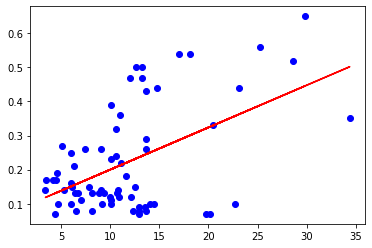

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.regressor import LinearRegression


X=sma.loc[:, sma.columns == 'BAI'].to_numpy()
# X=sma.loc[:, sma.columns != 'SM'].to_numpy()

t=sma[['SM']].to_numpy()
t=t.ravel()

ne_lr = LinearRegression()
ne_lr.fit(X, t)
y=ne_lr.predict(X)

print('Intercept: %.2f' % ne_lr.b_)
print('Slope: %.2f' % ne_lr.w_[0])

def lin_regplot(X, t, model):
    plt.scatter(X, t, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, t, ne_lr)
plt.show()

Let's plot the results

In [4]:
import math
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(t, y)
rmse = math.sqrt(mse)
print('RMSE = %.2f' %rmse, "m3/m3")

RMSE = 0.13 m3/m3


In [5]:
r2 = r2_score(t, y)
print("r2 =%.2f" %r2)

r2 =0.26


We have two questions: Which of the variables can best represent the variability in soil moisture and how we deal with a small number of variables.

For the first question, we can test each of the variables indivudually and then combine the most promissing.

For the second question, we need to use a concept called "CrossValidation". We will divide the total number of samples and change training and testing groups for "n" times, while tracking a goodness of fit statistic, like Mean Square Error or Coefficient of Determination (r2).

Let's implement this for Band 1 (blue)

In [10]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.preprocessing import minmax_scaling
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

x=sma.loc[:, sma.columns != 'SM'].to_numpy()

# robust scaling of the input data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# transformer=scaler.fit(Xo)
# x=transformer.transform(Xo)
from mlxtend.preprocessing import minmax_scaling
columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 
         20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
x=minmax_scaling(x,columns=columns )
x

2691

In [11]:
model = LinearRegression(method='svd')

In [17]:
# Forward Variable Selection(fvs)
fvs = SFS(model,
          k_features='best', #best or parsimonious (simplest model within 1 CI of best)
          forward=True,
          floating=False,
          verbose =0,
          cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [18]:
fvs.fit(x, t)
# sfs.k_feature_names_ 

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7fdac3edc640>,
                          k_features='best', n_jobs=4,
                          scoring='neg_mean_squared_error')

we can access the indices of the best features directly via the k_feature_idx_ attribute:

In [19]:
(fvs.k_feature_idx_)

(0, 2, 3, 4, 5, 6, 8, 10, 18, 22, 25, 27, 30, 33, 34, 36, 37)

the prediction score for these selected features can be accesses via k_score_:

In [20]:
fvs.k_score_

-0.01138302846586107

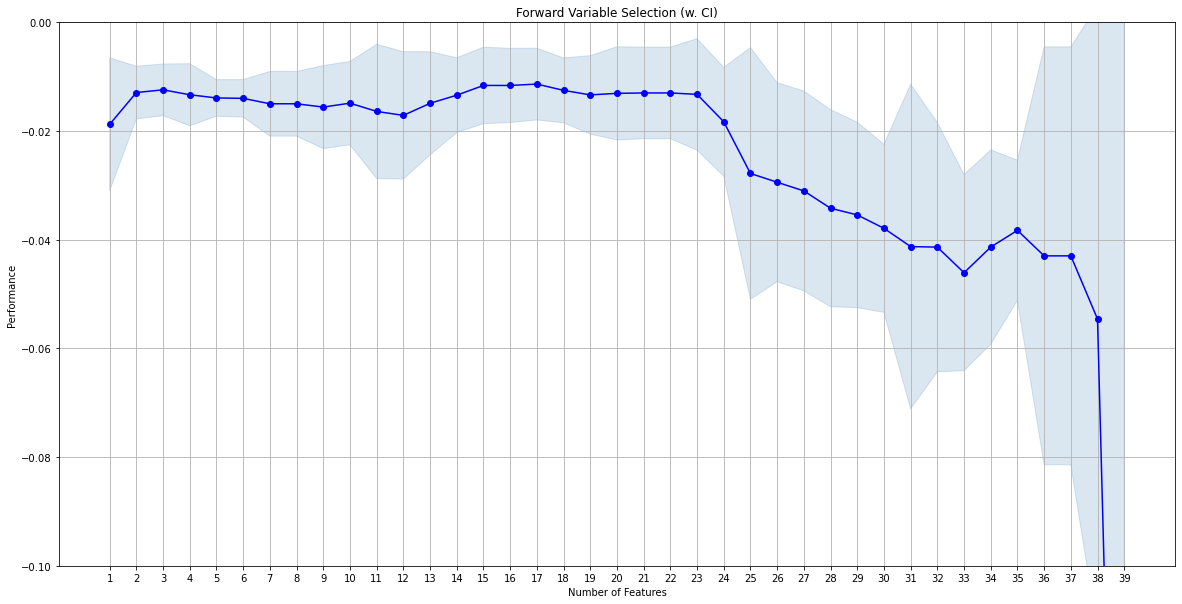

In [21]:
fig_fvs = plot_sfs(fvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Forward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

In [22]:
sfs_results=pd.DataFrame.from_dict(fvs.get_metric_dict()).T
sfs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.029013095449622564, -0.00896679724819429, ...",-0.018787,"(0,)",0.012218,0.007622,0.004401
2,"(0, 3)","[-0.017656680808811578, -0.012461227351718852,...",-0.012939,"(0, 3)",0.004846,0.003023,0.001746
3,"(0, 3, 22)","[-0.01677952835286285, -0.012971468620460174, ...",-0.012439,"(0, 3, 22)",0.004754,0.002966,0.001712
4,"(0, 3, 22, 36)","[-0.01706210531609671, -0.016452345833941406, ...",-0.013351,"(0, 3, 22, 36)",0.005712,0.003564,0.002057
5,"(0, 2, 3, 22, 36)","[-0.014701749414214732, -0.013302113300078675,...",-0.013933,"(0, 2, 3, 22, 36)",0.003369,0.002102,0.001214


In [23]:
#backward variable selection(bvs)
bvs = SFS(model,
         k_features='best',
         forward=False,
         floating=False,
         verbose =0,
         cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [24]:
bvs.fit(x, t.ravel())
# sfs1.k_feature_names_

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7fdac3edc640>,
                          forward=False, k_features='best', n_jobs=4,
                          scoring='neg_mean_squared_error')

In [25]:
(bvs.k_feature_idx_)

(1,
 2,
 4,
 6,
 8,
 9,
 10,
 14,
 15,
 16,
 19,
 20,
 21,
 26,
 27,
 28,
 29,
 31,
 33,
 35,
 36,
 37)

In [26]:
bvs.k_score_

-0.00890223772399217

In [27]:
bvs_results=pd.DataFrame.from_dict(bvs.get_metric_dict()).T
bvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.036135698549478935, -0.7771399268366989, -...",-0.239659,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.499237,0.311443,0.179811
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...","[-0.03634342847801871, -0.028327918801466047, ...",-0.040165,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...",0.01534,0.00957,0.005525
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...","[-0.01905616919563994, -0.03180259063161459, -...",-0.029012,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...",0.016166,0.010085,0.005823
36,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[-0.025362830822614854, -0.029361299795741497,...",-0.021382,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",0.010353,0.006459,0.003729
35,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[-0.022096950734206186, -0.020686718160044585,...",-0.017951,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...",0.007532,0.004699,0.002713


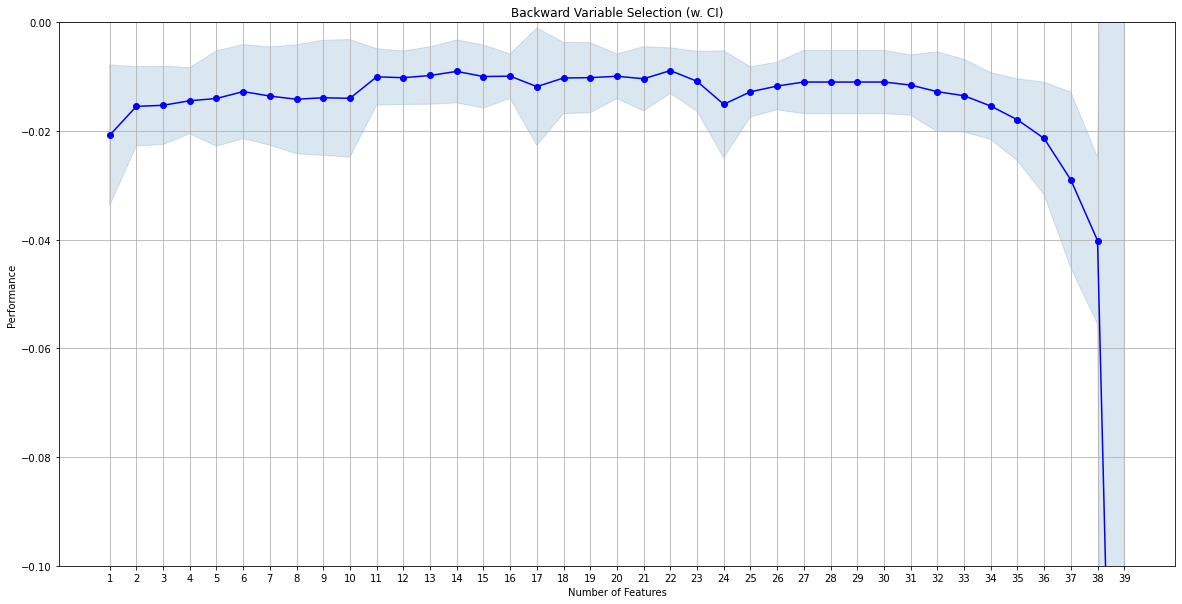

In [28]:
# bvs.k_feature_names_
fig1 = plot_sfs(bvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Backward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

In [29]:
# Forward Floating Selection(sffs)
ffvs = SFS(model,
         k_features='best',
         forward=True,
         floating=True,
         verbose =0,
         cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [30]:
ffvs.fit(x, t.ravel())
# sffs.k_feature_names_

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7fdac3edc640>,
                          floating=True, k_features='best', n_jobs=4,
                          scoring='neg_mean_squared_error')

In [31]:
ffvs_results=pd.DataFrame.from_dict(ffvs.get_metric_dict()).T
ffvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.029013095449622564, -0.00896679724819429, ...",-0.018787,"(0,)",0.012218,0.007622,0.004401
2,"(0, 3)","[-0.017656680808811578, -0.012461227351718852,...",-0.012939,"(0, 3)",0.004846,0.003023,0.001746
3,"(2, 3, 22)","[-0.014785990244933607, -0.007659285256810886,...",-0.012291,"(2, 3, 22)",0.004768,0.002975,0.001717
4,"(1, 2, 3, 22)","[-0.015561849640752393, -0.006968403023482545,...",-0.011818,"(1, 2, 3, 22)",0.005265,0.003285,0.001896
5,"(1, 2, 3, 6, 22)","[-0.015606912519484706, -0.006990290958858142,...",-0.01225,"(1, 2, 3, 6, 22)",0.005784,0.003608,0.002083


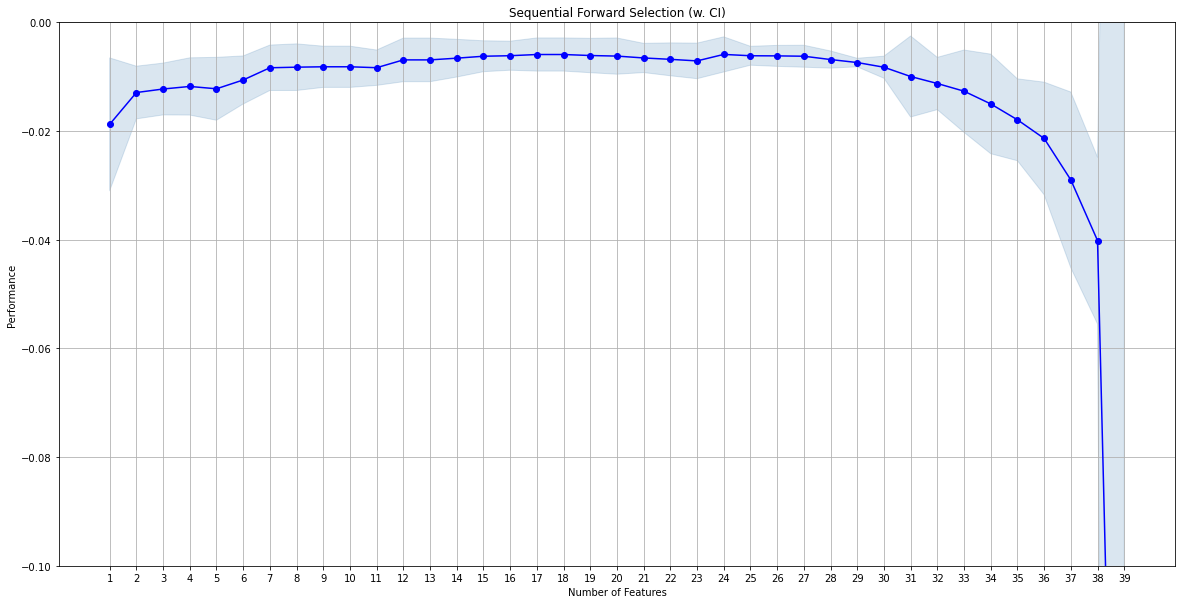

In [32]:
fig1 = plot_sfs(ffvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Sequential Forward Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)

plt.show()

In [33]:
(ffvs.k_feature_idx_)

(1,
 2,
 4,
 5,
 6,
 8,
 9,
 11,
 12,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38)

In [34]:
ffvs.k_score_

-0.005925781953063062

In [35]:
# Backward Floating Selection(sffs)
bfvs = SFS(model,
         k_features='best',
         forward=False,
         floating=True,
         verbose =0,
          cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [36]:
bfvs.fit(x, t.ravel())

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7fdac3edc640>,
                          floating=True, forward=False, k_features='best',
                          n_jobs=4, scoring='neg_mean_squared_error')

In [37]:
(bfvs.k_feature_idx_)

(1, 4, 6, 8, 9, 16, 17, 19, 20, 22, 27, 32, 33, 35)

In [38]:
bfvs.k_score_

-0.00751217821377872

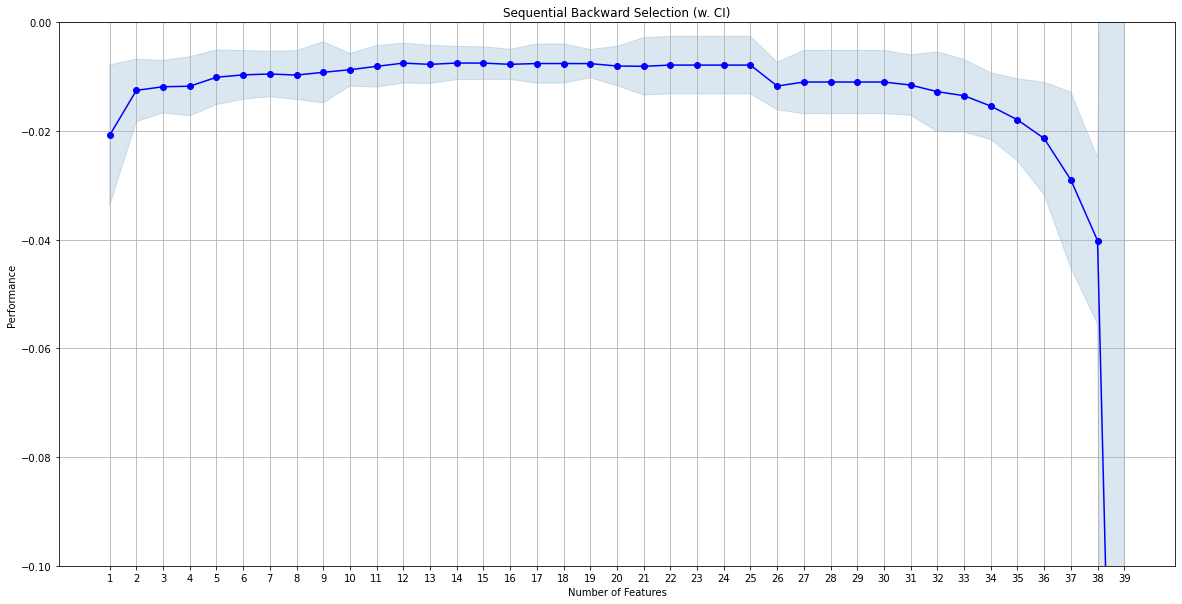

In [39]:
fig1 = plot_sfs(bfvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Sequential Backward Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)

plt.show()

In [ ]:
# Exhaustive Feature Selector(effs)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

effs = EFS(model,
           min_features=1,
           max_features=4,
           print_progress=True,
           scoring = 'neg_mean_squared_error',
           n_jobs=4)

Identifying the best RVM parameter (gamma)

In [ ]:
efs1 = effs.fit(x, t)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)

In [ ]:
(efs1.k_feature_idx_)

Let's do the same for all the other inputs

Using the three best bands

In [ ]:
X=sm[['B1','B3','B2','B4','B5','B6', 'B7']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B7_gamma_sel = gammas[scores == np.max(scores)]
print(B7_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B7_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B7_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B7_rmse, "m3/m3")

B7_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B7_r2)

In [ ]:
plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

In [ ]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')

We found a winner! In the next step we will apply this RVM model to all four Landsat images 

https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32